In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

import os

In [3]:
df_results = pd.read_csv(cwd + '/data/RegularSeasonDetailedResults.csv')

In [5]:
df_results['WFGM']-df_results['LFGM']

0        5
1        2
2        2
3        0
4        6
        ..
87499    3
87500   -3
87501    1
87502    3
87503    4
Length: 87504, dtype: int64

In [7]:
dfW = df_results.groupby(['Season','WTeamID']).sum().reset_index()
dfW

,Season,WTeamID,DayNum,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,1102,694,825,15438,638,0,271,480,120,...,170,125,174,127,216,92,170,71,11,243
1,2003,1103,1023,1141,16243,1019,4,390,720,71,...,265,220,302,174,261,178,208,84,32,326
2,2003,1104,1011,1270,21910,1046,1,439,992,120,...,335,190,268,191,389,184,257,88,43,344
3,2003,1105,528,556,8797,465,0,179,433,64,...,122,112,165,92,165,87,154,50,28,140
4,2003,1106,1023,888,15628,753,1,322,700,76,...,182,213,302,149,255,120,207,113,32,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,2019,1462,1164,1385,22719,1195,0,498,997,136,...,469,163,243,166,377,251,209,127,40,333
5825,2019,1463,1583,1759,25525,1472,0,651,1257,168,...,506,276,373,203,484,245,227,140,52,367
5826,2019,1464,750,781,12853,696,0,280,634,101,...,209,148,194,92,248,120,113,37,34,150
5827,2019,1465,782,961,15625,794,0,329,690,115,...,201,178,258,127,268,123,143,47,29,219


In [8]:
wcond = (dfW['Season'] == row['Season']) & (dfW['WTeamID'] == row['WTeamID']) 

NameError: name 'row' is not defined

In [2]:
cwd = os.getcwd()

In [4]:
df_seeds = pd.read_csv(cwd + '/data/MNCAATourneySeeds.csv')
df_tour = pd.read_csv(cwd + '/data/MNCAATourneyCompactResults.csv')

In [5]:
df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [6]:
df_tour.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [7]:
def seed_to_int(seed):
    s_int = int(seed[1:3])
    return s_int

In [8]:
df_seeds['seed_int'] = df_seeds.Seed.apply(seed_to_int)

In [9]:
df_seeds.head()

,Season,Seed,TeamID,seed_int
0,1985,W01,1207,1
1,1985,W02,1210,2
2,1985,W03,1228,3
3,1985,W04,1260,4
4,1985,W05,1374,5


In [10]:
df_seeds.drop(labels=['Seed'], inplace=True, axis=1)

In [11]:
df_seeds.head()

,Season,TeamID,seed_int
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5


In [12]:
df_tour.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [13]:
df_tour.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tour.head()

,Season,WTeamID,LTeamID
0,1985,1116,1234
1,1985,1120,1345
2,1985,1207,1250
3,1985,1229,1425
4,1985,1242,1325


In [14]:
df_seeds.head()

,Season,TeamID,seed_int
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5


In [15]:
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'seed_int':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'seed_int':'LSeed'})
df_dummy = pd.merge(left=df_tour, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'LTeamID'])
df_concat['SeedDiff'] = df_concat.WSeed - df_concat.LSeed
df_concat.head()

,Season,WTeamID,LTeamID,WSeed,LSeed,SeedDiff
0,1985,1116,1234,9,8,1
1,1985,1120,1345,11,6,5
2,1985,1207,1250,1,16,-15
3,1985,1229,1425,9,8,1
4,1985,1242,1325,3,14,-11


In [16]:
df_wins = pd.DataFrame()
df_wins['SeedDiff'] = df_concat['SeedDiff']
df_wins['Result'] = 1

df_losses = pd.DataFrame()
df_losses['SeedDiff'] = -df_concat['SeedDiff']
df_losses['Result'] = 0

df_predictions = pd.concat((df_wins, df_losses))
df_predictions.head()

,SeedDiff,Result
0,1,1
1,5,1
2,-15,1
3,1,1
4,-11,1


In [19]:
X_train = df_predictions.SeedDiff.values.reshape(-1,1)
y_train = df_predictions.Result.values
X_train, y_train = shuffle(X_train, y_train)

In [20]:
logreg = LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.554, with best C: 0.01


C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\C176616\AppData\

Text(0, 0.5, 'P(Team1 will win)')

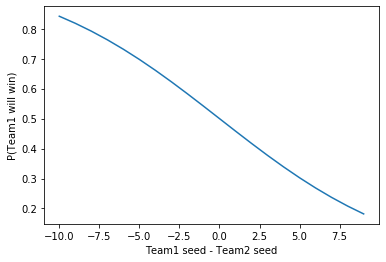

In [21]:
X = np.arange(-10, 10).reshape(-1, 1)
preds = clf.predict_proba(X)[:,1]

plt.plot(X, preds)
plt.xlabel('Team1 seed - Team2 seed')
plt.ylabel('P(Team1 will win)')

In [54]:
df_odds = pd.read_csv(cwd + '/data/MSampleSubmissionStage1_2020.csv')
n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

In [55]:
X_test = np.zeros(shape=(n_test_games, 1))
for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    t1_seed = df_seeds[(df_seeds.TeamID == t1) & (df_seeds.Season == year)].seed_int.values[0]
    t2_seed = df_seeds[(df_seeds.TeamID == t2) & (df_seeds.Season == year)].seed_int.values[0]
    diff_seed = t1_seed - t2_seed
    X_test[ii, 0] = diff_seed

In [56]:
preds = clf.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)
df_odds.Pred = clipped_preds
df_odds.head()

,ID,Pred
0,2015_1107_1112,0.118726
1,2015_1107_1116,0.181917
2,2015_1107_1124,0.137347
3,2015_1107_1125,0.541665
4,2015_1107_1129,0.377273


In [46]:
df_2019Seeds = pd.read_csv(cwd + '\\data\\2019Seeds.csv')
df_2019Seeds.head()

,Slot,StrongSeed,WeakSeed
0,W11,W11a,W11b
1,W16,W16a,W16b
2,X11,X11a,X11b
3,X16,X16a,X16b
4,R1W1,W01,W16


In [47]:
df_2019TourneySeeds = pd.read_csv(cwd + '\\data\\2019TourneySeeds.csv')
df_2019TourneySeeds.head()

,Seed,TeamID
0,W01,1181
1,W02,1277
2,W03,1261
3,W04,1439
4,W05,1280


In [49]:
df_teams = pd.read_csv(cwd + '\\data\\Teams.csv')
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019


In [51]:
df_merged = pd.merge(left = df_2019TourneySeeds, right = df_teams, on=['TeamID'])
df_merged.head()

,Seed,TeamID,TeamName,FirstD1Season,LastD1Season
0,W01,1181,Duke,1985,2019
1,W02,1277,Michigan St,1985,2019
2,W03,1261,LSU,1985,2019
3,W04,1439,Virginia Tech,1985,2019
4,W05,1280,Mississippi St,1985,2019


In [52]:
df_merged.drop(labels=['FirstD1Season','LastD1Season'], inplace=True, axis=1)
df_merged.head()

,Seed,TeamID,TeamName
0,W01,1181,Duke
1,W02,1277,Michigan St
2,W03,1261,LSU
3,W04,1439,Virginia Tech
4,W05,1280,Mississippi St


In [62]:
def runRound(df_roundSeeds, df_merged):
    df_roundResults = pd.DataFrame()
    
    df_roundResults['Slot'] =  df_roundSeeds.Slot
    df_roundResults['StrongSeed'] =  df_roundSeeds.StrongSeed
    df_roundResults['WeakSeed'] =  df_roundSeeds.WeakSeed    
    df_roundResults['StrongSeedID']= np.zeros(len(df_roundResults))
    df_roundResults['WeakSeedID'] = np.zeros(len(df_roundResults))
    df_roundResults['StrongSeedName'] = np.zeros(len(df_roundResults))
    df_roundResults['StrongSeedName'] = str(df_roundResults.StrongSeedName)    
    df_roundResults['WeakSeedName'] = np.zeros(len(df_roundResults))
    df_roundResults['WeakSeedName'] = str(df_roundResults.WeakSeedName)    
    df_roundResults['WinPCT']= np.zeros(len(df_roundResults))
    df_roundResults['RNGResult']= np.zeros(len(df_roundResults))
    df_roundResults['WinnerID']= np.zeros(len(df_roundResults))    
    df_roundResults['WinnerName']= np.zeros(len(df_roundResults))
    df_roundResults['WinnerName'] = str(df_roundResults.WinnerName)
    
    for i, row in df_roundSeeds.iterrows():
        df_roundResults['StrongSeedID'][i] = df_merged.loc[df_merged['Seed']==row.StrongSeed]['TeamID']
        df_roundResults['WeakSeedID'][i] = df_merged.loc[df_merged['Seed']==row.WeakSeed]['TeamID']
        df_roundResults['StrongSeedName'][i] = (df_merged.loc[df_merged['Seed']==row.StrongSeed]['TeamName']).item()
        df_roundResults['WeakSeedName'][i] = (df_merged.loc[df_merged['Seed']==row.WeakSeed]['TeamName']).item()
        df_roundResults['RNGResult'][i] = np.random.rand(1)        
        strongSeedID =  int(df_roundResults['StrongSeedID'][i])
        weakSeedID = int(df_roundResults['WeakSeedID'][i])
#    
        odds_string = '2019_'+str(strongSeedID)+'_'+str(weakSeedID)
        testValue = df_odds.loc[df_odds['ID']==odds_string]['Pred'] 
#        odds_string = '2019_'+str(strongSeedID)+'_'+str(weakSeedID)
#        odds_string2 = '2019_'+str(weakSeedID)+'_'+str(strongSeedID)
#        #if strong seed listed first
#        if not df_odds.loc[df_odds['ID']==odds_string]['Pred'].empty:
#            testValue = df_odds.loc[df_odds['ID']==odds_string]['Pred']       
#            
#        #if weak seed listed first
#        else:
#            testValue= df_odds.loc[df_odds['ID']==odds_string2]['Pred'] 
#            testValue = 1-testValue
        
        df_roundResults['WinPCT'][i] = testValue
    #        df_round1Results['WinPCT'][i] = df_odds.loc[df_odds['ID']==odds_string2]['Pred'] 
    #        
        #if RNG > win pct, strong see wins
        if df_roundResults['RNGResult'][i] < df_roundResults['WinPCT'][i]:
            df_roundResults['WinnerID'][i] = df_roundResults['StrongSeedID'][i]
            df_roundResults['WinnerName'][i] = df_roundResults['StrongSeedName'][i]
        #else, weak seed wins
        else:
            df_roundResults['WinnerID'][i] = df_roundResults['WeakSeedID'][i]
            df_roundResults['WinnerName'][i] = df_roundResults['WeakSeedName'][i]
            
        moddb = pd.DataFrame({'Seed':df_roundResults.Slot[i],'TeamID':df_roundResults.WinnerID[i],'TeamName':df_roundResults.WinnerName[i]}, index = [0])
        df_merged = pd.concat([moddb, df_merged.ix[:]]).reset_index(drop=True)
    
#     df_roundResults.to_csv(outputFile, index=False)
    return df_merged, df_roundResults

In [63]:
df_preRound1Seeds = pd.read_excel(cwd + '\Intermediate Data\PreRound1Seeds.xlsx')

In [58]:
df_preRound1Seeds.head()

,Slot,StrongSeed,WeakSeed
0,W11,W11a,W11b
1,W16,W16a,W16b
2,X11,X11a,X11b
3,X16,X16a,X16b


In [64]:
preRound1_df_merged, df_preRound1Results = runRound(df_preRound1Seeds, df_merged)

C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [65]:
df_preRound1Results.head()

,Slot,StrongSeed,WeakSeed,StrongSeedID,WeakSeedID,StrongSeedName,WeakSeedName,WinPCT,RNGResult,WinnerID,WinnerName
0,W11,W11a,W11b,1125.0,1396.0,Belmont,Temple,0.5,0.600611,1396.0,Temple
1,W16,W16a,W16b,1295.0,1300.0,N Dakota St,NC Central,0.5,0.166569,1295.0,N Dakota St
2,X11,X11a,X11b,1113.0,1385.0,Arizona St,St John's,0.5,0.289630,1113.0,Arizona St
3,X16,X16a,X16b,1192.0,1341.0,F Dickinson,Prairie View,0.5,0.581852,1341.0,Prairie View


In [66]:
preRound1_df_merged.head()

,Seed,TeamID,TeamName
0,X16,1341.0,Prairie View
1,X11,1113.0,Arizona St
2,W16,1295.0,N Dakota St
3,W11,1396.0,Temple
4,W01,1181.0,Duke


In [72]:
df_preRound1Seeds = pd.read_excel(cwd + '\\Intermediate Data\\PreRound1Seeds.xlsx')
df_round1Seeds = pd.read_excel(cwd + '\\Intermediate Data\\round1Seeds.xlsx')
df_round2Seeds = pd.read_excel(cwd + '\\Intermediate Data\\round2Seeds.xlsx')
df_round3Seeds = pd.read_excel(cwd + '\\Intermediate Data\\round3Seeds.xlsx')
df_round4Seeds = pd.read_excel(cwd + '\\Intermediate Data\\round4Seeds.xlsx')
df_round5Seeds = pd.read_excel(cwd + '\\Intermediate Data\\round5Seeds.xlsx')
df_round6Seeds = pd.read_excel(cwd + '\\Intermediate Data\\round6Seeds.xlsx')

In [73]:
preRound1_df_merged, df_preRound1Results = runRound(df_preRound1Seeds, df_merged)
df_preRound1Results.head()

C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Slot,StrongSeed,WeakSeed,StrongSeedID,WeakSeedID,StrongSeedName,WeakSeedName,WinPCT,RNGResult,WinnerID,WinnerName
0,W11,W11a,W11b,1125.0,1396.0,Belmont,Temple,0.5,0.196622,1125.0,Belmont
1,W16,W16a,W16b,1295.0,1300.0,N Dakota St,NC Central,0.5,0.743942,1300.0,NC Central
2,X11,X11a,X11b,1113.0,1385.0,Arizona St,St John's,0.5,0.293474,1113.0,Arizona St
3,X16,X16a,X16b,1192.0,1341.0,F Dickinson,Prairie View,0.5,0.465264,1192.0,F Dickinson


In [105]:
preRound1_df_merged, df_preRound1Results = runRound(df_preRound1Seeds, df_merged)

C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [106]:
round1_df_merged, df_round1Results = runRound(df_round1Seeds, preRound1_df_merged)

C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\C176616\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [ ]:

round2_df_merged, df_round2Results = runRound(df_round2Seeds, round1_df_merged)
round3_df_merged, df_round3Results = runRound(df_round3Seeds, round2_df_merged)
round4_df_merged, df_round4Results = runRound(df_round4Seeds, round3_df_merged)
round5_df_merged, df_round5Results = runRound(df_round5Seeds, round4_df_merged)
round6_df_merged, df_round6Results = runRound(df_round6Seeds, round5_df_merged)

In [104]:
round2_df_merged.head()

NameError: name 'round2_df_merged' is not defined

In [ ]:
Round1Distance = (1200-100)/32
leftMargin = 20
topMargin = 50

currentX = 0+leftMargin
currentY = 0+topMargin

teamLength = 85
teamDistance = 20

#E1-16
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

(720.75, 814.25, 349.65, 390.35)

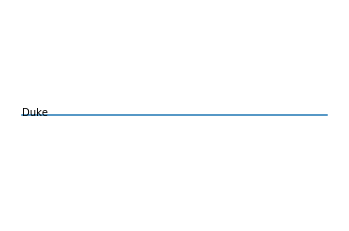

In [82]:
plt.plot([currentX, currentX + teamLength],[currentY, currentY])
plt.annotate(df_round1Results.StrongSeedName[0], xy=(currentX, currentY))
plt.axis('off')

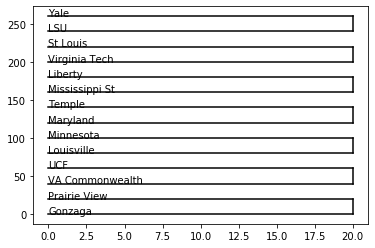

In [96]:
TEAMLENGTH = 20
TEAMDISTANCE = 20
currentX = 0
currentY = 0

# plot 
for i in range(0,7):
    j = 8-i
    plt.plot([currentX, currentX + TEAMLENGTH],[currentY, currentY], color='black')
    plt.annotate(df_round1Results.StrongSeedName[j], xy=(currentX, currentY))
    
    plt.plot([currentX + TEAMLENGTH, currentX + TEAMLENGTH], [currentY, currentY+TEAMDISTANCE], color='black')
    
    currentY = currentY + TEAMDISTANCE
    
    plt.plot([currentX, currentX + TEAMLENGTH],[currentY, currentY], color='black')
    plt.annotate(df_round1Results.WeakSeedName[j], xy=(currentX, currentY))
        
    currentY = currentY + TEAMDISTANCE

In [98]:
df_round1Results.loc[df_round1Results['Slot'] == 'R1W1']

,Slot,StrongSeed,WeakSeed,StrongSeedID,WeakSeedID,StrongSeedName,WeakSeedName,WinPCT,RNGResult,WinnerID,WinnerName
0,R1W1,W01,W16,1181.0,1300.0,Duke,NC Central,0.016354,0.190175,1300.0,NC Central


In [97]:
df_round1Results

,Slot,StrongSeed,WeakSeed,StrongSeedID,WeakSeedID,StrongSeedName,WeakSeedName,WinPCT,RNGResult,WinnerID,WinnerName
0,R1W1,W01,W16,1181.0,1300.0,Duke,NC Central,0.016354,0.190175,1300.0,NC Central
1,R1W2,W02,W15,1277.0,1133.0,Michigan St,Bradley,0.028586,0.339641,1133.0,Bradley
2,R1W3,W03,W14,1261.0,1463.0,LSU,Yale,0.357059,0.078830,1261.0,LSU
3,R1W4,W04,W13,1439.0,1387.0,Virginia Tech,St Louis,0.084963,0.954268,1387.0,St Louis
4,R1W5,W05,W12,1280.0,1251.0,Mississippi St,Liberty,0.196970,0.253242,1251.0,Liberty
5,R1W6,W06,W11,1268.0,1396.0,Maryland,Temple,0.715879,0.760270,1396.0,Temple
6,R1W7,W07,W10,1257.0,1278.0,Louisville,Minnesota,0.322138,0.629254,1278.0,Minnesota
7,R1W8,W08,W09,1433.0,1416.0,VA Commonwealth,UCF,0.658133,0.017514,1433.0,VA Commonwealth
8,R1X1,X01,X16,1211.0,1341.0,Gonzaga,Prairie View,0.022838,0.057874,1341.0,Prairie View
9,R1X2,X02,X15,1276.0,1285.0,Michigan,Montana,0.902288,0.638943,1276.0,Michigan


In [99]:
df_round2Results

,Slot,StrongSeed,WeakSeed,StrongSeedID,WeakSeedID,StrongSeedName,WeakSeedName,WinPCT,RNGResult,WinnerID,WinnerName
0,R2W1,R1W1,R1W8,1300.0,1433.0,NC Central,VA Commonwealth,0.735953,0.299902,1300.0,NC Central
1,R2W2,R1W2,R1W7,1133.0,1278.0,Bradley,Minnesota,0.809337,0.056428,1133.0,Bradley
2,R2W3,R1W3,R1W6,1261.0,1396.0,LSU,Temple,0.103557,0.910991,1396.0,Temple
3,R2W4,R1W4,R1W5,1387.0,1251.0,St Louis,Liberty,0.842352,0.417875,1387.0,St Louis
4,R2X1,R1X1,R1X8,1341.0,1393.0,Prairie View,Syracuse,0.133231,0.878076,1393.0,Syracuse
5,R2X2,R1X2,R1X7,1276.0,1196.0,Michigan,Florida,0.426936,0.063153,1276.0,Michigan
6,R2X3,R1X3,R1X6,1297.0,1138.0,N Kentucky,Buffalo,0.795961,0.382921,1297.0,N Kentucky
7,R2X4,R1X4,R1X5,1436.0,1293.0,Vermont,Murray St,0.912226,0.761576,1436.0,Vermont
8,R2Y1,R1Y1,R1Y8,1314.0,1449.0,North Carolina,Washington,0.024034,0.826687,1449.0,Washington
9,R2Y2,R1Y2,R1Y7,1101.0,1371.0,Abilene Chr,Seton Hall,0.570471,0.348573,1101.0,Abilene Chr


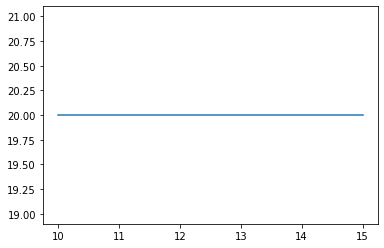

In [77]:
plt.plot([10,15],[20,20])

In [76]:
from graphics import *

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

baseDirectory = os.getcwd()
resultsDirectory = baseDirectory + '\\Results'


df_round1Results = pd.read_csv(resultsDirectory + '\\round1Results.csv')


#Create Libraries
win = GraphWin("Bracket", 1200, 800)


Round1Distance = (1200-100)/32
leftMargin = 20
topMargin = 50

currentX = 0+leftMargin
currentY = 0+topMargin

teamLength = 85
teamDistance = 20

#E1-16
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance


line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#E8-9
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[7]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[7]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#E5-12
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[4]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[4]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#E4-13
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[3]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[3]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#E6-11
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[5]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[5]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#3-14
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[2]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[2]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#7-10
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[6]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[6]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#E2-15
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance




#W1-16
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[8]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[8]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W8-9
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[15]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[15]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W5-12
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[12]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[12]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W4-13
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[11]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[11]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W6-11
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[13]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[13]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W3-14
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[10]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[10]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W7-10
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[14]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[14]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

#W2-15
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.StrongSeedName[9]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round1Results.WeakSeedName[9]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + teamDistance

    
currentY = 0+topMargin
for i in range(16):
    line1 = Line(Point(currentX+teamLength, currentY), Point(currentX+teamLength, currentY + teamDistance))
    line1.draw(win)
    currentY = currentY + 2*teamDistance
    

###############################################
#Round 2
df_round2Results = pd.read_csv(resultsDirectory + '\\round2Results.csv')

currentY = 0 + topMargin+teamDistance/2
currentX = currentX + teamLength

#R2E1
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2E2
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[3]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[3]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2E3
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[2]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[2]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2E4
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2W1
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[4]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[4]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2W2
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[7]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[7]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2W3
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[6]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[6]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2W4
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.StrongSeedName[5]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength, currentY))
teamName = df_round2Results.WeakSeedName[5]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance
    
currentY = 0 + topMargin+teamDistance/2
currentX = currentX + teamLength
for i in range(8):
    line1 = Line(Point(currentX,currentY), Point(currentX, currentY+2*teamDistance))
    line1.draw(win)
    currentY = currentY + 4*teamDistance

###############################
#Round 3    
df_round3Results = pd.read_csv(resultsDirectory + '\\round3Results.csv')
currentY = 0 + topMargin + 1.5*teamDistance

#R3E1
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.StrongSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.WeakSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#R3E2
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.StrongSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.WeakSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#R2W1
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.StrongSeedName[2]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.WeakSeedName[2]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#R2W2
line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.StrongSeedName[3]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX+teamLength,currentY))
teamName = df_round3Results.WeakSeedName[3]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)    
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#####################################
#Round4
df_round4Results = pd.read_csv(resultsDirectory + '\\round4Results.csv')

currentY = 0 + topMargin + 1.5*teamDistance
currentX = currentX + teamLength

for i in range(4):
    line1 = Line(Point(currentX, currentY), Point(currentX, currentY + 4*teamDistance))
    line1.draw(win)
    currentY = currentY + 8*teamDistance

    
currentY = 0 + topMargin + 3.5*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round4Results.StrongSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + 8*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round4Results.WeakSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + 8*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round4Results.StrongSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + 8*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round4Results.WeakSeedName[1]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + 8*teamDistance

######################################
#Round 5
currentY = 0 + topMargin + 3.5*teamDistance
currentX = currentX + teamLength

df_round5Results = pd.read_csv(resultsDirectory + '\\round5Results.csv')

for i in range(2):
    line1 = Line(Point(currentX, currentY), Point(currentX, currentY + 8*teamDistance))
    line1.draw(win)
    currentY = currentY + 16*teamDistance
    
currentY = 0 + topMargin + 7.5*teamDistance

#R5 Final Four
line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round5Results.StrongSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 16*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
teamName = df_round5Results.WeakSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 16*teamDistance
    
#Final
df_round6Results = pd.read_csv(resultsDirectory + '\\round6Results.csv')
currentY = 0+topMargin + 7.5*teamDistance
currentX = currentX + teamLength

line1 = Line(Point(currentX,currentY), Point(currentX, currentY + 16*teamDistance))

line1.draw(win)

currentY = currentY + 8.5*teamDistance
line1 = Line(Point(currentX, currentY), Point(currentX + teamLength, currentY))
teamName = df_round6Results.WeakSeedName[0]
label = Text(Point(currentX+teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)

endingXPoint = currentX+teamLength/2

#####################################################
#####################################################
#####################################################
#right half
rightMargin = 50
currentX = 1200-rightMargin
currentY = 0 + topMargin

#R1S1
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[24]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[24]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S2
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[31]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[31]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S3
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[28]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[28]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S4
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[27]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[27]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S5
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[29]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[29]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S6
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[26]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[26]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S7
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[30]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[30]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1S8
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[25]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[25]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW1
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[16]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[16]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW2
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[23]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[23]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW3
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[20]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[20]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW4
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[19]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[19]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW5
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[21]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[21]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW6
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[18]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[18]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW7
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[22]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[22]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

#R1MW8
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.StrongSeedName[17]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round1Results.WeakSeedName[17]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
label.draw(win)
line1.draw(win)
currentY = currentY + teamDistance
    
currentY = 0+topMargin
for i in range(16):
    line1 = Line(Point(currentX-teamLength, currentY), Point(currentX-teamLength, currentY + teamDistance))
    line1.draw(win)
    currentY = currentY + 2*teamDistance
    
###################################
#Round 2
    
currentY = 0 + topMargin+teamDistance/2
currentX = currentX - teamLength

#R2S1
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[12]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[12]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2S2
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[15]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[15]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2S3
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[14]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[14]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2S4
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[13]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[13]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2MW1
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[8]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[8]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2MW2
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[11]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[11]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2MW3
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[10]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[10]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

#R2MW4
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.StrongSeedName[9]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength, currentY))
teamName = df_round2Results.WeakSeedName[9]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 2*teamDistance
    
currentY = 0 + topMargin+teamDistance/2
currentX = currentX - teamLength
for i in range(8):
    line1 = Line(Point(currentX,currentY), Point(currentX, currentY+2*teamDistance))
    line1.draw(win)
    currentY = currentY + 4*teamDistance
    
    
##################################
#Round 3
currentY = 0 + topMargin + 1.5*teamDistance

#R3S1
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.StrongSeedName[6]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.WeakSeedName[6]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#R3S2
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.StrongSeedName[7]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.WeakSeedName[7]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#R3MW1
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.StrongSeedName[4]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.WeakSeedName[4]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

#R3MW2
line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.StrongSeedName[5]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance

line1 = Line(Point(currentX,currentY), Point(currentX-teamLength,currentY))
teamName = df_round3Results.WeakSeedName[5]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 4*teamDistance
    
currentY = 0 + topMargin + 1.5*teamDistance
currentX = currentX - teamLength

for i in range(4):
    line1 = Line(Point(currentX, currentY), Point(currentX, currentY + 4*teamDistance))
    line1.draw(win)
    currentY = currentY + 8*teamDistance

############################
#Round 4
    
currentY = 0 + topMargin + 3.5*teamDistance
#R4S1
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round4Results.StrongSeedName[3]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 8*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round4Results.WeakSeedName[3]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 8*teamDistance

#R4MW1
line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round4Results.StrongSeedName[2]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 8*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round4Results.WeakSeedName[2]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 8*teamDistance

currentY = 0 + topMargin + 3.5*teamDistance
currentX = currentX - teamLength
for i in range(2):
    line1 = Line(Point(currentX, currentY), Point(currentX, currentY + 8*teamDistance))
    line1.draw(win)
    currentY = currentY + 16*teamDistance

#####################
#Final Four
currentY = 0 + topMargin + 7.5*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round5Results.StrongSeedName[1]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 16*teamDistance

line1 = Line(Point(currentX, currentY), Point(currentX-teamLength, currentY))
teamName = df_round5Results.WeakSeedName[1]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)
currentY = currentY + 16*teamDistance
    
currentY = 0+topMargin + 7.5*teamDistance
currentX = currentX - teamLength
line1 = Line(Point(currentX,currentY), Point(currentX, currentY + 16*teamDistance))
line1.draw(win)


##########################
#Final
currentY = currentY + 8.5*teamDistance
line1 = Line(Point(currentX, currentY), Point(currentX - teamLength, currentY))
teamName = df_round6Results.StrongSeedName[0]
label = Text(Point(currentX-teamLength/2, currentY-5),teamName)
line1.draw(win)
label.draw(win)



#########################
#Winner

#


#
line1 = Line(Point(endingXPoint+50, currentY), Point(currentX-teamLength-10, currentY))
line1.draw(win)
# 
teamName = df_round6Results.WinnerName[0]
label = Text(Point(endingXPoint + 100, currentY-5),teamName)

label.draw(win)   
#
##Round 1
#for i in range(16):
#    line1 = Line(Point(currentX, currentY), Point(currentX+teamLength, currentY))
#    line2 = Line(Point(currentX, currentY+teamDistance), Point(currentX+teamLength, currentY+teamDistance))
#    line3 = Line(Point(currentX+teamLength, currentY), Point(currentX+teamLength, currentY+teamDistance))
#    line1.draw(win)
#    line2.draw(win)
#    line3.draw(win)
#    currentY = currentY + gamesDistance
#
##Round 2    
#currentX = currentX + teamLength
#currentY = 0 + topMargin
#for i in range(8):
#    line1 = Line(Point(currentX,currentY+teamDistance/2), Point(currentX+teamLength, currentY+teamDistance/2))
#    line2 = Line(Point(currentX,currentY+teamDistance+gamesDistance), Point(currentX+teamLength, currentY + teamDistance+gamesDistance))
##    line3 = Line(Point(currentX + teamLength, currentY+teamDistance/2), Point(currentX+teamLength, currentY+teamDistance+gamesDistance))
#    line1.draw(win)
#    line2.draw(win)
##    line3.draw(win)
#    currentY = currentY + gamesDistance
#    
#Round 3
#currentX = CurrentX + teamLength
#currentY = 0 + topMargin

#for i in range(8):

win.getMouse()
win.close()